Generailized Linear Models  

In mathematical notion.
$$\hat{y}(\omega, x)=\omega_0 + \omega_1x_1 + \ldots +\omega_px_p$$ 
We designate the vector $\omega=(\omega_1,\ldots,\omega_p)$ as **conef\_** and $\omega_0$ as **intercept\_**

# 1 Ordinary Least Squares
$$\underset{\omega}{min}={\rvert \rvert X \omega -y \rvert \rvert}_{2}^2$$

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 2], [2,2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
reg.coef_

array([  1.00000000e+00,   7.85046229e-17])

# 2 Ridge Regression
The ridge regression minimize a penalized residual sum of the squares
$$\underset{min}{\omega}{\rvert \rvert X \omega -y \rvert \rvert}_{2}^2 + \alpha {\rvert \rvert \omega \rvert \rvert}_2^2$$
The lager the value of $\alpha$, the greater the amount of shrinkage and the thus the coefficients become more robust to collinearity

In [5]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0,0],[0,0],[1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [7]:
reg.intercept_

0.13636363636363641

## 2.1 example

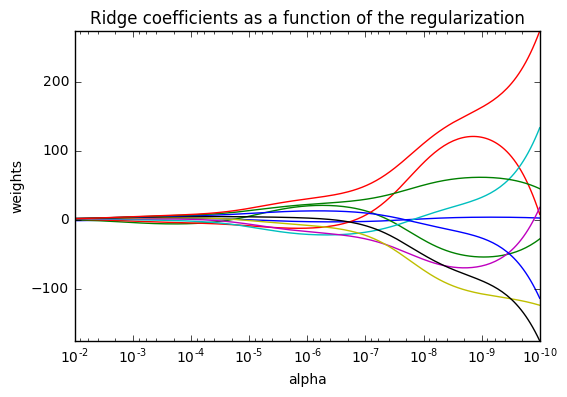

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
# display
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 2.2 generialized cross-validation

In [16]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10])
reg.fit([[0,0], [0,0],[1, 1]], [0, .1, 1])

RidgeCV(alphas=[0.1, 1.0, 10], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [17]:
reg.alpha_

0.10000000000000001

# 3 Lasso
It is useful in some context due to its tendency to prefer solutions with fewer parameters values, effectively reducing the number of variables upon which the given solution is dependent.
$$\underset{\omega}{min}\frac{1}{2n_{samples}}{\rvert}X\omega -y\rvert_2^{2} + \alpha{\rvert}w{\rvert}_1$$

In [18]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0,0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
reg.predict([[1,1]])

array([ 0.8])

# 4 Logistic regression
As an optimization problem, binary class L2 penalized logistic regression minimizes the following cost function.
$$\underset{\omega, c}{min}\frac{1}{2}\omega^T\omega + C\sum_{i=1}^{n}log\bigg(exp\big(-y_i(X_i^T\omega+c)\big)+1\bigg)$$

computing regularzation path ...
this took 0:00:00.055290


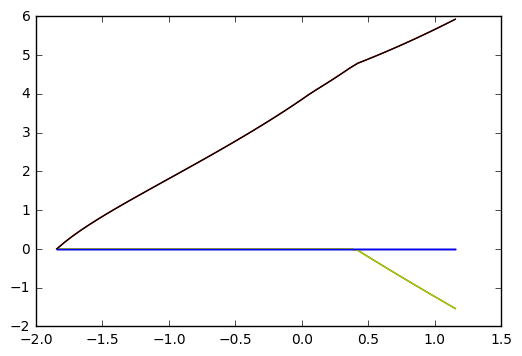

In [26]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
iris = datasets.load_iris()
X = iris.data
y= iris.target
X = X[y!=2]
y = y[y!=2]
X -= np.mean(X, 0)
cs =l1_min_c(X, y, loss='log')*np.logspace(0, 3)
print('computing regularzation path ...')
start = datetime.now()
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coef_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coef_.append(clf.coef_.ravel().copy())
print('this took', datetime.now() - start)
coefs_ = np.array(coef_)
plt.plot(np.log10(cs), coefs_)
#ymin, ymax = plg.ylim()
plt.show()

# 5 Robustness regression
Dealing the presence of corrupt data: either outliers, or error in the model.   
The Scikit-learn provides 3 robust regression estimators: 
+ RANSAC
+ Theil Sen
+ HuberRegressor

## RANSA: (RANdom SAmple Consensus)
[wiki](https://en.wikipedia.org/wiki/Random_sample_consensus)

Estimated coefficients(true, normal, ransac)
82.1903908407869 [ 54.50103111] [ 82.19039084]


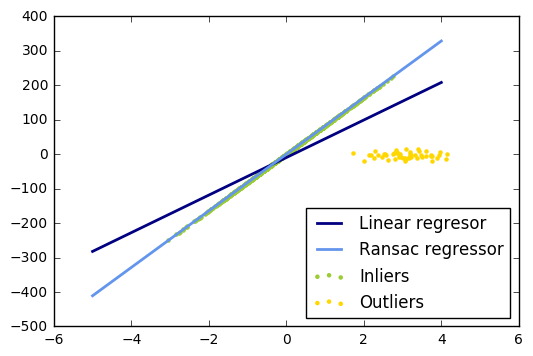

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
n_samples = 1000
n_outliers = 50
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features= 1,
                                     n_informative=1, noise=0,
                                     coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
#fit line using all data
model = linear_model.LinearRegression()
model.fit(X,y)
#robustly fit linear model with ransac algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X,y)
inliner_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inliner_mask)
#predict data of the estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:,np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])
#compare estimated coefficient
print('Estimated coefficients(true, normal, ransac)')
print(coef, model.coef_, model_ransac.estimator_.coef_)
lw = 2
plt.scatter(X[inliner_mask], y[inliner_mask], color='yellowgreen', marker='.',
           label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
           label='Outliers')
plt.plot(line_X, line_y, color='navy', linestyle='-', linewidth=lw, label='Linear regresor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='Ransac regressor')
plt.legend(loc='lower right')
plt.show()

# 6 polynomial regression
If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model look ilis this:
$$\hat{y}(\omega, x)=\omega_0+\omega_1x_1+\omega_2x_2+\omega_3x_1x_2+\omega_4x_1^2+\omega_5x_2^2$$

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])
x = np.arange(5)
y = 3-2*x + x**2-x**3
model = model.fit(x[:,np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])